This notebook is a simple example of  [LightGraphs.jl](https://github.com/JuliaGraphs/LightGraphs.jl) and [GraphPlot.jl](https://github.com/JuliaGraphs/GraphPlot.jl).

Official sample  
http://juliagraphs.github.io/GraphPlot.jl/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Sample" data-toc-modified-id="Sample-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sample</a></span></li><li><span><a href="#Basic" data-toc-modified-id="Basic-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic</a></span><ul class="toc-item"><li><span><a href="#Undirected-graph" data-toc-modified-id="Undirected-graph-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Undirected graph</a></span></li><li><span><a href="#Directed-graph" data-toc-modified-id="Directed-graph-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Directed graph</a></span></li><li><span><a href="#Connected-graph" data-toc-modified-id="Connected-graph-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Connected graph</a></span></li><li><span><a href="#Complete-graph" data-toc-modified-id="Complete-graph-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Complete graph</a></span></li><li><span><a href="#Cycle-graph" data-toc-modified-id="Cycle-graph-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Cycle graph</a></span></li><li><span><a href="#Erdős–Rényi" data-toc-modified-id="Erdős–Rényi-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Erdős–Rényi</a></span></li><li><span><a href="#Barabási–Albert" data-toc-modified-id="Barabási–Albert-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Barabási–Albert</a></span></li><li><span><a href="#methods" data-toc-modified-id="methods-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>methods</a></span><ul class="toc-item"><li><span><a href="#Default-methods" data-toc-modified-id="Default-methods-2.8.1"><span class="toc-item-num">2.8.1&nbsp;&nbsp;</span>Default methods</a></span></li><li><span><a href="#LinAlg" data-toc-modified-id="LinAlg-2.8.2"><span class="toc-item-num">2.8.2&nbsp;&nbsp;</span>LinAlg</a></span></li><li><span><a href="#user-defined" data-toc-modified-id="user-defined-2.8.3"><span class="toc-item-num">2.8.3&nbsp;&nbsp;</span>user defined</a></span></li></ul></li></ul></li><li><span><a href="#Random-walk" data-toc-modified-id="Random-walk-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random walk</a></span><ul class="toc-item"><li><span><a href="#n-iterations-random-walk" data-toc-modified-id="n-iterations-random-walk-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>n iterations random walk</a></span></li><li><span><a href="#First-passage-time" data-toc-modified-id="First-passage-time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>First passage time</a></span></li><li><span><a href="#Cover-time" data-toc-modified-id="Cover-time-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cover time</a></span></li></ul></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plot</a></span><ul class="toc-item"><li><span><a href="#Basic-plot" data-toc-modified-id="Basic-plot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic plot</a></span></li><li><span><a href="#Layout" data-toc-modified-id="Layout-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Layout</a></span></li><li><span><a href="#Color" data-toc-modified-id="Color-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Color</a></span></li><li><span><a href="#Save-figures" data-toc-modified-id="Save-figures-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Save figures</a></span></li></ul></li><li><span><a href="#Weighted-graph" data-toc-modified-id="Weighted-graph-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weighted graph</a></span></li></ul></div>

In [1]:
srand(2017)
versioninfo()

println("\nLightGraphs v", Pkg.installed("LightGraphs"))
println("GraphPlot v", Pkg.installed("GraphPlot"))

Julia Version 0.6.1
Commit 0d7248e* (2017-10-24 22:15 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i5-4460T CPU @ 1.90GHz
  WORD_SIZE: 64
  BLAS: libopenblas (HASWELL)
  LAPACK: libopenblas
  LIBM: libm
  LLVM: libLLVM-3.9.1 (ORCJIT, haswell)

LightGraphs v0.11.0
GraphPlot v0.2.0+


In [2]:
# Pkg.add("LightGraphs")
# Pkg.add("GraphPlot")
using LightGraphs, GraphPlot

INFO: Recompiling stale cache file /home/tk/.julia/lib/v0.6/GraphPlot.ji for module GraphPlot.


In [3]:
ggplot(G; arg...) = begin srand(1); gplot(G; layout=circular_layout, nodelabel=1:nv(G),arg...); end

ggplot (generic function with 1 method)

# Sample

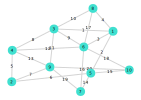

In [4]:
nvertices, nedges = 10, 20
G = Graph(nvertices, nedges)
gplot(G, nodelabel=1:nvertices, edgelabel=1:nedges)
# gplot(G, nodelabel=1:nvertices, edgelabel=1:nedges, layout=circular_layout)

In [5]:
connected_components(G)[1]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

# Basic

## Undirected graph

In [6]:
# make a graph
g = Graph()

empty undirected simple Int64 graph

In [7]:
# add vertex
add_vertex!(g)

true

In [8]:
g

{1, 0} undirected simple Int64 graph

In [9]:
add_vertex!(g)

true

In [10]:
g

{2, 0} undirected simple Int64 graph

In [11]:
# add n verties
addnumv = 10
add_vertices!(g, addnumv)

true

In [12]:
g

{12, 0} undirected simple Int64 graph

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[13], in expression starting on line 2


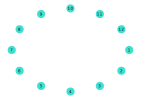

In [13]:
# plot the graph
gplot(g, nodelabel=1:nv(g), layout=circular_layout) # nv returns the nunmber of vertices

In [14]:
# remove a vertex labeled 1.
rem_vertex!(g, 1)

true

In [15]:
g

{11, 0} undirected simple Int64 graph

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[16], in expression starting on line 1


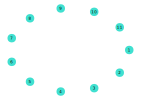

In [16]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [17]:
# add edge between vertex 1 and vertex 8
add_edge!(g, 1, 8)

true

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[18], in expression starting on line 1


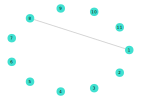

In [18]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[19], in expression starting on line 4


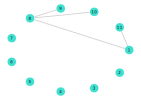

In [19]:
add_edge!(g, 8, 10)
add_edge!(g, 8, 9)
add_edge!(g, 1, 11)
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [20]:
# in_neighbors list
for i in 1:nv(g)
    println("in_neighbors(g, $i) = " , in_neighbors(g, i))
end

in_neighbors(g, 1) = [8, 11]
in_neighbors(g, 2) = Int64[]
in_neighbors(g, 3) = Int64[]
in_neighbors(g, 4) = Int64[]
in_neighbors(g, 5) = Int64[]
in_neighbors(g, 6) = Int64[]
in_neighbors(g, 7) = Int64[]
in_neighbors(g, 8) = [1, 9, 10]
in_neighbors(g, 9) = [8]
in_neighbors(g, 10) = [8]
in_neighbors(g, 11) = [1]


In [21]:
rem_vertex!(g, 8)

true

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[22], in expression starting on line 2


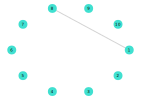

In [22]:
# nodes name is mutable
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [23]:
# in_neighbors list
for i in 1:nv(g)
    println("in_neighbors(G, $i) = " , in_neighbors(g, i))
end

in_neighbors(G, 1) = [8]
in_neighbors(G, 2) = Int64[]
in_neighbors(G, 3) = Int64[]
in_neighbors(G, 4) = Int64[]
in_neighbors(G, 5) = Int64[]
in_neighbors(G, 6) = Int64[]
in_neighbors(G, 7) = Int64[]
in_neighbors(G, 8) = [1]
in_neighbors(G, 9) = Int64[]
in_neighbors(G, 10) = Int64[]


## Directed graph

In [24]:
g = DiGraph()

empty directed simple Int64 graph

In [25]:
add_vertex!(g)

true

In [26]:
g

{1, 0} directed simple Int64 graph

In [27]:
add_vertex!(g)

true

In [28]:
g

{2, 0} directed simple Int64 graph

In [29]:
addnumv = 10
add_vertices!(g, addnumv)

true

In [30]:
g

{12, 0} directed simple Int64 graph

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[31], in expression starting on line 1


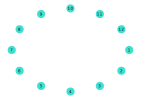

In [31]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [32]:
rem_vertex!(g, 1)

true

In [33]:
g

{11, 0} directed simple Int64 graph

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[34], in expression starting on line 1


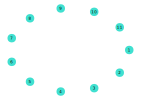

In [34]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [35]:
add_edge!(g, 1, 8) # add edge between vertex 1 and vertex 8

true

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[36], in expression starting on line 1


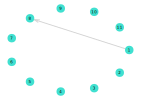

In [36]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[37], in expression starting on line 4


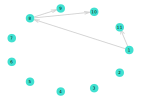

In [37]:
add_edge!(g, 8, 10)
add_edge!(g, 8, 9)
add_edge!(g, 1, 11)
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [38]:
# in_neighbors list
for i in 1:nv(g)
    println("in_neighbors(G, $i) = " , in_neighbors(g, i))
end

in_neighbors(G, 1) = Int64[]
in_neighbors(G, 2) = Int64[]
in_neighbors(G, 3) = Int64[]
in_neighbors(G, 4) = Int64[]
in_neighbors(G, 5) = Int64[]
in_neighbors(G, 6) = Int64[]
in_neighbors(G, 7) = Int64[]
in_neighbors(G, 8) = [1]
in_neighbors(G, 9) = [8]
in_neighbors(G, 10) = [8]
in_neighbors(G, 11) = [1]


In [39]:
rem_vertex!(g, 8)

true

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[40], in expression starting on line 1


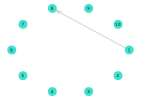

In [40]:
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [41]:
# neighbors list
for i in 1:nv(g)
    println("in_neighbors(G, $i) = " , in_neighbors(g, i))
end

in_neighbors(G, 1) = Int64[]
in_neighbors(G, 2) = Int64[]
in_neighbors(G, 3) = Int64[]
in_neighbors(G, 4) = Int64[]
in_neighbors(G, 5) = Int64[]
in_neighbors(G, 6) = Int64[]
in_neighbors(G, 7) = Int64[]
in_neighbors(G, 8) = [1]
in_neighbors(G, 9) = Int64[]
in_neighbors(G, 10) = Int64[]


## Connected graph

https://en.wikipedia.org/wiki/Connectivity_%28graph_theory%29

In [42]:
function CGraph(nv::Integer, ne::Integer; seed::Int = -1)
    @assert(ne >= (nv-1), "At least $(nv-1) edges are needed.")
    
    while true
        g = Graph(nv, ne, seed=seed)
        is_connected = length(connected_components(g)[1]) == nv
        if is_connected; return g; end
    end
end

CGraph (generic function with 1 method)

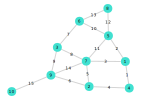

In [43]:
numv, nume = 10, 15
gplot(CGraph(numv, nume), nodelabel=1:numv, edgelabel=1:nume)

## Complete graph

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::Z

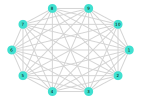

In [44]:
numv = 10
g = CompleteGraph(numv)
ggplot(g)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eve

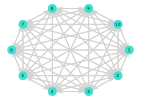

In [45]:
numv = 10
g = CompleteDiGraph(numv)
ggplot(g)

## Cycle graph

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::Z

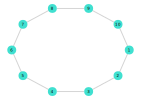

In [46]:
numv = 10
ggplot(CycleGraph(numv))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eve

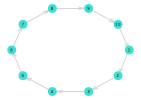

In [47]:
numv = 10
ggplot(CycleDiGraph(numv))

## Erdős–Rényi

Fixed number nodes and fixed number edges  
or  
fixed number nodes and probabilistic edges

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::Z

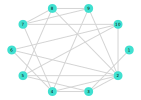

In [48]:
n = 10; nume = 20
g = erdos_renyi(n, nume) # equivalent to Graph(n, nume)
ggplot(g)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eve

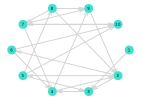

In [49]:
n = 10; nume = 20
ggplot(erdos_renyi(n, nume, is_directed=true))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::Z

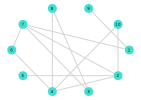

In [50]:
numv = 10; prob = 0.3
g = erdos_renyi(n, prob)
ggplot(g)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eve

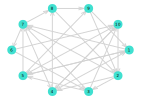

In [51]:
numv = 10; prob = 0.3
g = erdos_renyi(n, prob, is_directed=true)
ggplot(g)

## Barabási–Albert

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::Z

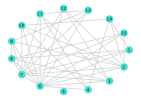

In [52]:
n, n0, k = 15, 5, 4
g = barabasi_albert(n, n0, k)
ggplot(g)

In [53]:
g = Graph(10,20)
eigenvector_centrality(g)

10-element Array{Float64,1}:
 0.0615333
 0.484418 
 0.274381 
 0.368248 
 0.309286 
 0.259024 
 0.295435 
 0.317987 
 0.328788 
 0.302342 

## methods

### Default methods

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] ggplot(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [10] eventloop(::Z

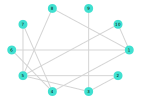

In [54]:
G = Graph(10,13)
ggplot(G)

In [55]:
LightGraphs.nv(G) # the number of vertices

10

In [56]:
LightGraphs.ne(G) # the number of edges

13

In [57]:
edges(G)

SimpleEdgeIter 13

In [58]:
edgetype(G)

LightGraphs.SimpleGraphs.SimpleEdge{Int64}

In [59]:
v = 2
has_vertex(G, v)

true

In [60]:
# neighbor list
v = 3
in_neighbors(G, v)

3-element Array{Int64,1}:
 2
 5
 9

In [61]:
for e in edges(G)
    u, v = src(e), dst(e)
    println("edge $u - $v")
end

edge 1 - 4
edge 1 - 6
edge 1 - 8
edge 1 - 10
edge 2 - 3
edge 2 - 5
edge 3 - 5
edge 3 - 9
edge 4 - 6
edge 4 - 7
edge 5 - 7
edge 5 - 8
edge 5 - 10


In [62]:
connected_components(G)

1-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/ex

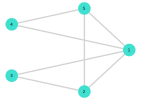

In [63]:
G = Graph(5,7)
ggplot(G, nodelabel=1:nv(G))

In [64]:
adjacency_matrix(G)

5×5 SparseMatrixCSC{Int64,Int64} with 14 stored entries:
  [2, 1]  =  1
  [3, 1]  =  1
  [4, 1]  =  1
  [5, 1]  =  1
  [1, 2]  =  1
  [3, 2]  =  1
  [5, 2]  =  1
  [1, 3]  =  1
  [2, 3]  =  1
  [1, 4]  =  1
  [5, 4]  =  1
  [1, 5]  =  1
  [2, 5]  =  1
  [4, 5]  =  1

In [65]:
full(adjacency_matrix(G))

5×5 Array{Int64,2}:
 0  1  1  1  1
 1  0  1  0  1
 1  1  0  0  0
 1  0  0  0  1
 1  1  0  1  0

In [66]:
full(adjacency_matrix(G))

5×5 Array{Int64,2}:
 0  1  1  1  1
 1  0  1  0  1
 1  1  0  0  0
 1  0  0  0  1
 1  1  0  1  0

In [67]:
laplacian_matrix(G)

5×5 SparseMatrixCSC{Int64,Int64} with 19 stored entries:
  [1, 1]  =  4
  [2, 1]  =  -1
  [3, 1]  =  -1
  [4, 1]  =  -1
  [5, 1]  =  -1
  [1, 2]  =  -1
  [2, 2]  =  3
  [3, 2]  =  -1
  [5, 2]  =  -1
  [1, 3]  =  -1
  [2, 3]  =  -1
  [3, 3]  =  2
  [1, 4]  =  -1
  [4, 4]  =  2
  [5, 4]  =  -1
  [1, 5]  =  -1
  [2, 5]  =  -1
  [4, 5]  =  -1
  [5, 5]  =  3

### LinAlg

In [68]:
using LightGraphs.LinAlg

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/ex

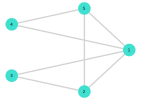

In [69]:
G = Graph(5,7)
ggplot(G, nodelabel=1:nv(G))

In [70]:
@time LightGraphs.LinAlg.adjacency_spectrum(G)

  0.598139 seconds (394.08 k allocations: 22.719 MiB, 2.41% gc time)


5-element Array{Float64,1}:
 -1.61803 
 -1.47283 
 -0.462598
  0.618034
  2.93543 

In [71]:
eigvals(adjacency_matrix(G)) # Julia default eigvals does not support sparse matrix

LoadError: [91mMethodError: no method matching eigvals(::SparseMatrixCSC{Int64,Int64})[0m
Closest candidates are:
  eigvals(::AbstractArray{TA,2}, [91m::AbstractArray{TB,2}[39m) where {TA, TB} at linalg/eigen.jl:408
  eigvals([91m::SymTridiagonal{T}[39m) where T at linalg/tridiag.jl:187
  eigvals([91m::SymTridiagonal{T}[39m, [91m::UnitRange[39m) where T at linalg/tridiag.jl:194
  ...[39m

In [72]:
laplacian_spectrum(G)

5-element Array{Float64,1}:
 -4.75314e-16
  1.58579    
  3.0        
  4.41421    
  5.0        

### user defined

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/ex

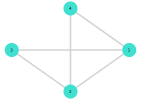

In [73]:
G = Graph(4,5)
ggplot(G, nodelabel=1:nv(G))

In [74]:
adjacency_matrix(G) |> full

4×4 Array{Int64,2}:
 0  1  1  1
 1  0  1  1
 1  1  0  0
 1  1  0  0

In [75]:
function transtion_matrix(g::AbstractGraph)
    A = adjacency_matrix(g)
    D = vec(sum(A, 1))
    return dropzeros((A ./ D)')
end

transtion_matrix (generic function with 1 method)

In [76]:
transtion_matrix(G)

4×4 SparseMatrixCSC{Float64,Int64} with 10 stored entries:
  [2, 1]  =  0.333333
  [3, 1]  =  0.333333
  [4, 1]  =  0.333333
  [1, 2]  =  0.333333
  [3, 2]  =  0.333333
  [4, 2]  =  0.333333
  [1, 3]  =  0.5
  [2, 3]  =  0.5
  [1, 4]  =  0.5
  [2, 4]  =  0.5

In [77]:
transtion_matrix(G) |> full

4×4 Array{Float64,2}:
 0.0       0.333333  0.5  0.5
 0.333333  0.0       0.5  0.5
 0.333333  0.333333  0.0  0.0
 0.333333  0.333333  0.0  0.0

In [78]:
A = adjacency_matrix(G)
D = vec(sum(A, 1))
diagm(1 ./ D) * A

4×4 Array{Float64,2}:
 0.0       0.333333  0.333333  0.333333
 0.333333  0.0       0.333333  0.333333
 0.5       0.5       0.0       0.0     
 0.5       0.5       0.0       0.0     

In [79]:
D = vec(sum(A, 1))

4-element Array{Int64,1}:
 3
 3
 2
 2

In [80]:
eigvecs(transtion_matrix(G) |> full)[:,1] / sum(eigvecs(transtion_matrix(G) |> full)[:,1])

4-element Array{Float64,1}:
 0.3
 0.3
 0.2
 0.2

# Random walk

## n iterations random walk

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[81], in expression starting on line 4


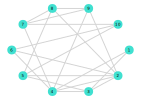

In [81]:
srand(1)
numv,nume = 10, 20
g = Graph(numv, nume)
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [82]:
startnode = 1
niter = 20
randomwalk(g, startnode, niter)

20-element Array{Int64,1}:
  1
  4
  2
  8
  5
  3
  1
  4
  2
  4
  7
  9
  4
  2
  9
  7
 10
  6
 10
  5

## First passage time

In [83]:
"""
    fpt(g, s, f ;niter)
First passsage time

Perform a random walk on graph `g` starting at vertex `s` and finishing at vertex `f`.
niter is upper bound of the number of iterations to avoid infinite loop. Default is 10*nv(g)
Return a vector of vertices visited in order and total time step.
"""
function fpt(g::AG, s::Integer, f::Integer ;niter::Integer=10*nv(g)) where AG <: AbstractGraph{T} where T
    s in vertices(g) || throw(BoundsError())
    f in vertices(g) || throw(BoundsError())
    Bool(in.(s, connected_components(g))' * in.(f, connected_components(g)))|| error("Node $s and node $f are disconnected")
    visited = Vector{T}()
    sizehint!(visited, niter)
    currs = s
    i = 1
    while true
        push!(visited, currs)
        i += 1
        currs = rand(out_neighbors(g, currs))
        if currs == f
            push!(visited, currs)
            break
        end
    end
    return visited[1:i], i-1
end

fpt

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[84], in expression starting on line 4


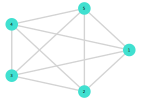

In [84]:
srand(1)
numv,nume = 5, 10
g = Graph(numv, nume)
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [85]:
startnode, finishnode = 1, 4
fpt(g, startnode, finishnode)

([1, 4], 1)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[86], in expression starting on line 4


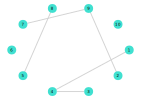

In [86]:
srand(1)
numv,nume = 10, 5
g = Graph(numv, nume)
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [87]:
startnode, finishnode = 1, 10
fpt(g, startnode, finishnode)

LoadError: [91mNode 1 and node 10 are disconnected[39m

## Cover time

In [88]:
"""
    ct(g, s ;niter)
Cover time

Perform a random walk on graph `g` starting at vertex `s` and continuing for steps that covers all node. 
Return a vector of vertices visited in order and total time step.
"""
function ct(g::AG, s::Integer ;niter::Integer=100_000) where AG <: AbstractGraph{T} where T
    s in vertices(g) || throw(BoundsError())
    (length(connected_components(g)[1]) == nv(g)) || error("The graph is disconnected.")
    visited = Vector{T}()
    sizehint!(visited, niter)
    currs = s
    i = 1
    while i <= niter
        push!(visited, currs)
        i += 1
        currs = rand(out_neighbors(g, currs))
        if length(Set(visited)) == nv(g); break; end
    end
    return visited[1:(i-1)], i-2
end

ct

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[89], in expression starting on line 4


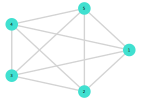

In [89]:
# srand(1)
numv,nume = 5, 10
g = Graph(numv, nume)
gplot(g, nodelabel=1:nv(g), layout=circular_layout)

In [90]:
startnode = 1
ct(g, startnode)

([1, 5, 2, 5, 2, 3, 4], 6)

# Plot

https://github.com/JuliaGraphs/GraphPlot.jl

## Basic plot

In [91]:
using Colors, Compose

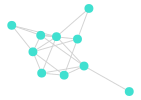

In [92]:
nvertices, nedges = 10, 20
G = Graph(nvertices, nedges)
gplot(G)

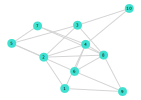

In [93]:
nvertices, nedges = 10, 20
G = Graph(nvertices, nedges)
gplot(G, nodelabel=1:nvertices)

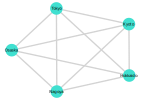

In [94]:
g = Graph(5,10)
gplot(g, nodelabel=["Tokyo", "Nagoya", "Osaska", "Kyoto", "Hokkaido"])

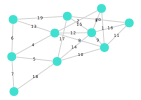

In [95]:
nvertices, nedges = 10, 20
G = Graph(nvertices, nedges)
gplot(G, edgelabel=1:nedges)

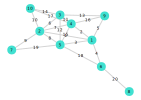

In [96]:
nvertices, nedges = 10, 20
G = Graph(nvertices, nedges)
gplot(G, nodelabel=1:nvertices, edgelabel=1:nedges)

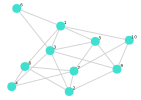

In [97]:
# Adjust node labels
nvertices, nedges = 10, 20
G = Graph(nvertices, nedges)
gplot(G, nodelabel=1:nvertices, nodelabeldist=1.5, nodelabelangleoffset=π/4)

## Layout

In [98]:
G = Graph(10,20)

{10, 20} undirected simple Int64 graph

In [99]:
#random_layout, circular_layout, spring_layout, shell_layout, stressmajorize_layout, spectral_layout

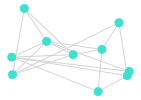

In [100]:
gplot(G, layout=random_layout)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[101], in expression starting on line 1


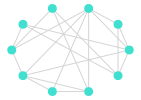

In [101]:
gplot(G, layout=circular_layout)

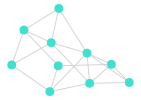

In [102]:
gplot(G, layout=spring_layout) # default

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] Array(::Type{Array{Int64,1}}, ::Int64) at ./deprecated.jl:57
 [3] shell_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}, ::Void) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:191
 [4] #gplot#38(::GraphPlot.#shell_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while loading In[103], in expression starting on line 1
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.

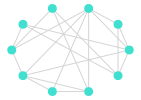

In [103]:
gplot(G, layout=shell_layout)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] isfinite(::Array{Float64,2}) at ./deprecated.jl:57
 [3] #stressmajorize_layout#19(::Int64, ::Float64, ::Float64, ::Float64, ::Bool, ::Bool, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}, ::Int64, ::Void, ::Array{Float64,2}) at /home/tk/.julia/v0.6/GraphPlot/src/stress.jl:66
 [4] #gplot#38(::GraphPlot.#stressmajorize_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [7] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/execute_request.jl:154
 [8] eventloop(::ZMQ.Socket) at /home/tk/.julia/v0.6/IJulia/src/eventloop.jl:8
 [9] (::IJulia.##14#17)() at ./task.jl:335
while l

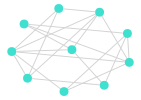

In [104]:
gplot(G, layout=stressmajorize_layout)

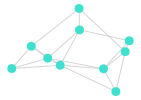

In [105]:
gplot(G, layout=spectral_layout)

## Color

In [106]:
using Colors

membership = [rand([1, 2]) for i = 1:nv(G)] = [2, 2, 1, 2, 1, 1, 2, 1, 1, 1]


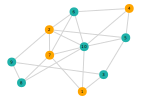

In [107]:
# nodes membership
G = Graph(10, 20)
@show membership = [rand([1,2]) for i in 1:nv(G)]
nodecolor = [colorant"lightseagreen", colorant"orange"]
# membership color
nodefillc = nodecolor[membership]
gplot(G, nodelabel=1:nvertices, nodefillc=nodefillc)

## Save figures

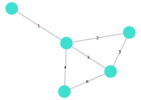

In [108]:
using Compose
srand(5)
g = Graph(5,6)
gplot(g, edgelabel=1:LightGraphs.ne(g))

In [109]:
# srand(1000)
draw(PDF("sample.pdf", 16cm, 16cm), gplot(g, nodelabel=1:nv(g), edgelabel=1:LightGraphs.ne(g)))

In [110]:
g = Graph(5,5, seed=3)
# draw(PDF("undirected.pdf", 16cm, 16cm), ggplot(g, nodelabel=1:nv(g), edgelabel=1:LightGraphs.ne(g)))
draw(PDF("undirected.pdf", 16cm, 16cm), ggplot(g, nodelabel=1:nv(g)))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/ex

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/ex

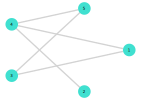

In [111]:
g = Graph(5,5, seed=3)
ggplot(g, nodelabel=1:nv(g))

In [112]:
A = adjacency_matrix(g) |> full

5×5 Array{Int64,2}:
 0  0  1  1  0
 0  0  0  1  0
 1  0  0  0  1
 1  1  0  0  1
 0  0  1  1  0

In [113]:
A = adjacency_matrix(g) |> full
A ./ degree(g)'

5×5 Array{Float64,2}:
 0.0  0.0  0.5  0.333333  0.0
 0.0  0.0  0.0  0.333333  0.0
 0.5  0.0  0.0  0.0       0.5
 0.5  1.0  0.0  0.0       0.5
 0.0  0.0  0.5  0.333333  0.0

In [114]:
g = DiGraph(5,5, seed=3)
# draw(PDF("directed.pdf", 16cm, 16cm), ggplot(g, nodelabel=1:nv(g), edgelabel=1:LightGraphs.ne(g)))
draw(PDF("directed.pdf", 16cm, 16cm), ggplot(g, nodelabel=1:nv(g)))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJu

In [115]:
g = DiGraph(5,5, seed=3)
ggplot(g, nodelabel=1:nv(g))
adjacency_matrix(g) |> full

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleDiGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJu

5×5 Array{Int64,2}:
 0  0  0  1  0
 0  0  0  0  0
 1  0  0  0  0
 0  1  0  0  1
 0  0  1  0  0

In [116]:
g = CompleteGraph(5)
gplot(g, nodelabel=1:nv(g))
draw(PDF("complete5.pdf", 16cm, 16cm), ggplot(g, nodelabel=1:nv(g)))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] circular_layout(::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/layout.jl:60
 [4] #gplot#38(::GraphPlot.#circular_layout, ::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at /home/tk/.julia/v0.6/GraphPlot/src/plot.jl:224
 [5] (::GraphPlot.#kw##gplot)(::Array{Any,1}, ::GraphPlot.#gplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [6] #ggplot#1(::Array{Any,1}, ::Function, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./In[3]:1
 [7] (::#kw##ggplot)(::Array{Any,1}, ::#ggplot, ::LightGraphs.SimpleGraphs.SimpleGraph{Int64}) at ./<missing>:0
 [8] include_string(::Module, ::String, ::String) at /home/tk/.julia/v0.6/Compat/src/Compat.jl:478
 [9] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/tk/.julia/v0.6/IJulia/src/ex

# Weighted graph

In [117]:
Pkg.add("SimpleWeightedGraphs")
using SimpleWeightedGraphs

INFO: Package SimpleWeightedGraphs is already installed


In [118]:
g = SimpleWeightedGraph(Graph(10,20))

{10, 20} undirected simple Int64 graph with Float64 weights

In [119]:
g.weights

10×10 SparseMatrixCSC{Float64,Int64} with 40 stored entries:
  [3 ,  1]  =  1.0
  [4 ,  1]  =  1.0
  [3 ,  2]  =  1.0
  [4 ,  2]  =  1.0
  [5 ,  2]  =  1.0
  [6 ,  2]  =  1.0
  [8 ,  2]  =  1.0
  [9 ,  2]  =  1.0
  [1 ,  3]  =  1.0
  [2 ,  3]  =  1.0
  ⋮
  [2 ,  8]  =  1.0
  [5 ,  8]  =  1.0
  [7 ,  8]  =  1.0
  [9 ,  8]  =  1.0
  [2 ,  9]  =  1.0
  [4 ,  9]  =  1.0
  [7 ,  9]  =  1.0
  [8 ,  9]  =  1.0
  [5 , 10]  =  1.0
  [6 , 10]  =  1.0
  [7 , 10]  =  1.0